In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
import pypfopt
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import CLA, plotting
from pypfopt import objective_functions

In [3]:
#import data 
stock_path = Path('../Resources/stock_prices.csv')
stock_prices = pd.read_csv(stock_path,parse_dates=True,index_col='Date',infer_datetime_format=True)

In [4]:
crypto_path = Path('../Resources/crypto_prices.csv')
crypto_prices = pd.read_csv(crypto_path,parse_dates=True,index_col='Date',infer_datetime_format=True)

In [5]:
prices=stock_prices.join(crypto_prices)

In [6]:
prices=prices.drop(columns="SPY")

## Calculating the covariance matrix

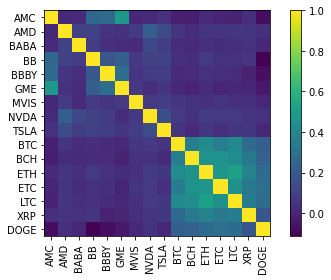

In [7]:
#Calculating the covariance matrix 
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

## Return estimation

In [8]:
mu = expected_returns.mean_historical_return(prices)
mu

AMC    -0.069066
AMD     0.580927
BABA    0.093133
BB     -0.020811
BBBY   -0.030631
GME     0.809258
MVIS    0.628576
NVDA    0.400135
TSLA    0.792867
BTC     1.040406
BCH     0.225117
ETH     0.935497
ETC     0.534400
LTC     0.522273
XRP     0.644360
DOGE    3.154055
dtype: float64

## Max Sharpe Ratio

In [9]:
#Max Sharpe
ef = EfficientFrontier(mu, S) 
ef.max_sharpe()

OrderedDict([('AMC', 0.0),
             ('AMD', 0.1562462723391428),
             ('BABA', 0.0),
             ('BB', 0.0),
             ('BBBY', 0.0),
             ('GME', 0.0969073792650799),
             ('MVIS', 0.0458846366323714),
             ('NVDA', 0.0549319823248896),
             ('TSLA', 0.242574350678294),
             ('BTC', 0.2004942397369767),
             ('BCH', 0.0),
             ('ETH', 0.0236124143357805),
             ('ETC', 0.0),
             ('LTC', 0.0),
             ('XRP', 0.0),
             ('DOGE', 0.1793487246874653)])

/Users/weirongtian/opt/anaconda3/envs/deeplearnenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


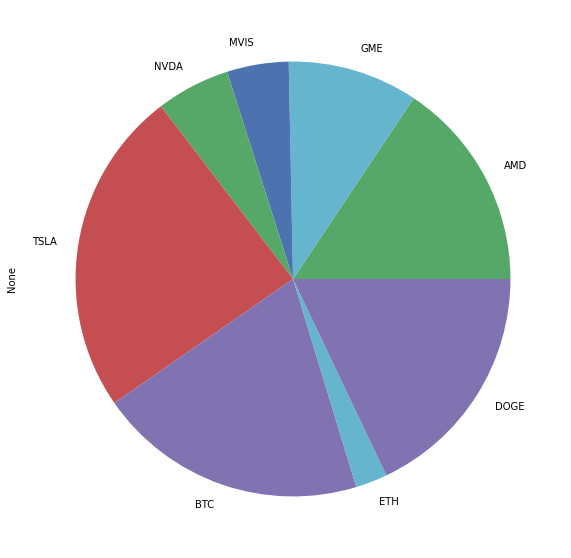

In [10]:
#draw pie chart
weights = ef.clean_weights()
pd.Series(weights).plot.pie(figsize=(10,10));

In [11]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

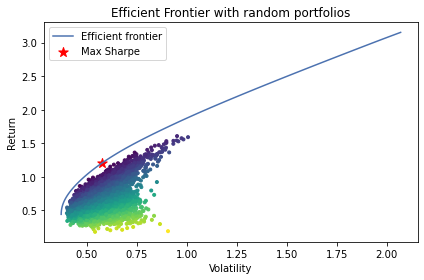

In [12]:
# draw Efficient frontier
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

In [13]:
#Maximise return givern risk
ef = EfficientFrontier(mu, S)
ef.efficient_risk(target_volatility=0.6)
ef.add_objective(objective_functions.L2_reg, gamma=0.1) 
weights = ef.clean_weights()
weights

OrderedDict([('AMC', 0.0),
             ('AMD', 0.15148),
             ('BABA', 0.0),
             ('BB', 0.0),
             ('BBBY', 0.0),
             ('GME', 0.09905),
             ('MVIS', 0.04472),
             ('NVDA', 0.0382),
             ('TSLA', 0.24739),
             ('BTC', 0.2053),
             ('BCH', 0.0),
             ('ETH', 0.0193),
             ('ETC', 0.0),
             ('LTC', 0.0),
             ('XRP', 0.0),
             ('DOGE', 0.19456)])

/Users/weirongtian/opt/anaconda3/envs/deeplearnenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


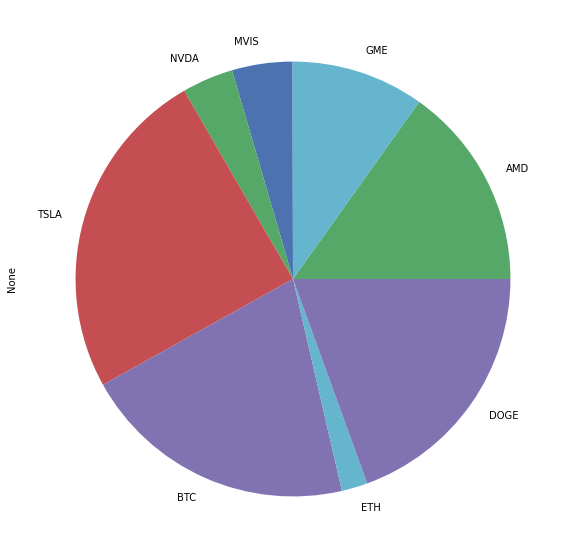

In [14]:
pd.Series(weights).plot.pie(figsize=(10, 10));

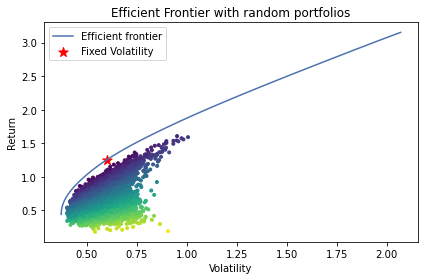

In [15]:
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef.efficient_risk(target_volatility=0.6)
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Fixed Volatility")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

In [16]:
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
ef.add_objective(objective_functions.L2_reg, gamma=0.1) 
ef.efficient_return(target_return=0.7)
weights = ef.clean_weights()
weights

OrderedDict([('AMC', 0.0),
             ('AMD', 0.13344),
             ('BABA', 0.14223),
             ('BB', 0.06966),
             ('BBBY', 0.05713),
             ('GME', 0.04983),
             ('MVIS', 0.0446),
             ('NVDA', 0.11459),
             ('TSLA', 0.14701),
             ('BTC', 0.12512),
             ('BCH', 0.0),
             ('ETH', 0.03694),
             ('ETC', 0.0),
             ('LTC', 0.0),
             ('XRP', 0.01342),
             ('DOGE', 0.06604)])

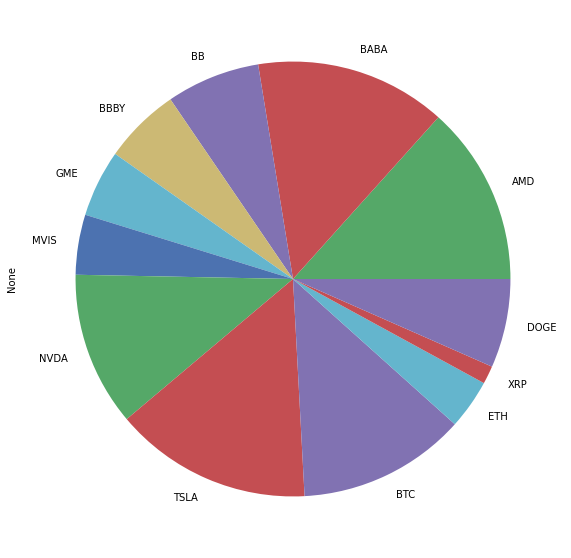

In [17]:
pd.Series(weights).plot.pie(figsize=(10, 10));

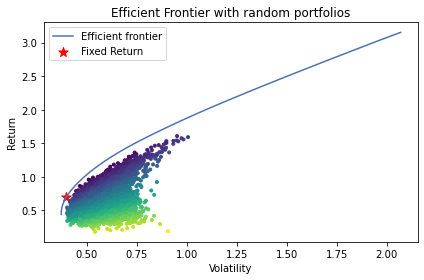

In [18]:
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef.efficient_return(0.7)
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Fixed Return")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()